# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [2]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

torch.Size([200, 2])
torch.Size([200, 1])


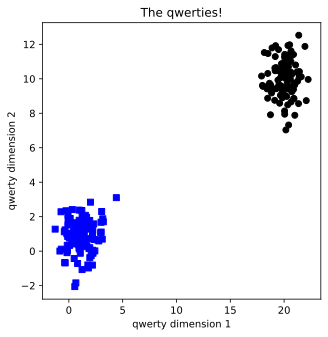

In [3]:
# create data

nPerClust = 100
blur = 1

# Where we are going to center the clusters
A = [  1, 1 ]
#B = [  5, 1 ]
B = [ 20, 10] # more separate, more accurate model

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels (category labels, as we are classifying)
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

print(data.shape)
print(labels.shape)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [105]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [106]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [107]:
# other model features

learningRate = .01

# loss function. Binary cross-entropy loss is the most common loss function for binary classification
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer. sgd = stochastic gradient descent (classic gradient descent)
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)


In [108]:
# train the model
numepochs = 1000
totalEpochs = numepochs
maxEpochs = 20000
minAccurracy = 90
losses = torch.zeros(maxEpochs)

for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad() # We clear the gradients from the previous epoch
  loss.backward() # we compute the gradient according to the loss => lossfun(yHat,labels)
  optimizer.step() # We update the model parameter using the optimizer (SGD)

firstPrediction = ANNclassify(data)
firstPredLabels = firstPrediction>.5
firstMissclassification = np.where(firstPredLabels!=labels)[0]
firstAcc = 100-100*len(firstMissclassification)/(2*nPerClust)
print('Final accuracy: %g%%' %firstAcc)

Final accuracy: 100%


In [109]:
tempTotalAcc = firstAcc

# modificaction of the training model (till 90% accuracy)
while tempTotalAcc < minAccurracy and totalEpochs < maxEpochs:
  for epochi in range(totalEpochs, totalEpochs+numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad() # We clear the gradients from the previous epoch
    loss.backward() # we compute the gradient according to the loss => lossfun(yHat,labels)
    optimizer.step() # We update the model parameter using the optimizer (SGD)

  totalEpochs += numepochs

  tempPrediction = ANNclassify(data)
  tempPredLabels = tempPrediction>.5
  tempMisclassification = np.where(tempPredLabels!=labels)[0]
  tempTotalAcc = 100-100*len(tempMisclassification)/(2*nPerClust)

  print('Accuracy: %g%%' %tempTotalAcc)
  print('Total epochs: %g' %totalEpochs)

print('Final accuracy: %g%%' %tempTotalAcc)
print('Total epochs: %g' %totalEpochs)

# Remove zeros from losses
losses = losses[losses != 0]

Final accuracy: 100%
Total epochs: 1000


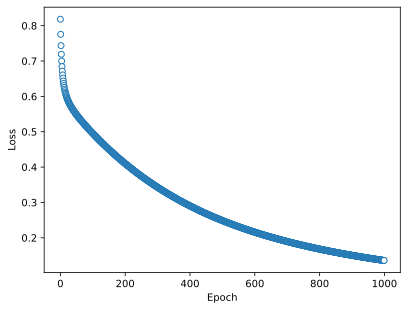

In [110]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [111]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5 # changing the value into True or False (booleans)

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 100%


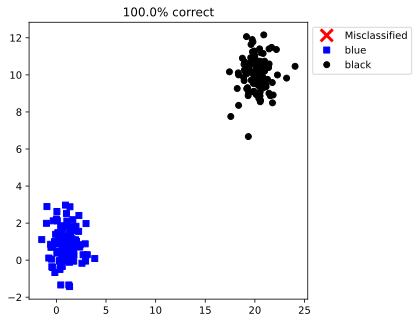

In [112]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs') # where false
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko') # where true

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

# Additional explorations

In [113]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
# 
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the 
#    qwerty-generating code to get the model to have 100% classification accuracy.
# 